In [151]:
import yfinance as yf
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

In [282]:
TICKERS = ["SPY", "SH", "SDS", "UPRO", "SSO", "SPXU"]
LEVERAGES = {"SPY": "1x", "SSO": "2x", "UPRO": "3x", "SH":"-1x", "SDS":"-2x", "SPXU": "-3x"}

In [283]:
# sns.set(rc={'figure.figsize':(8,5)})

In [284]:
def collect_historical(ticker):
    ticker_class = yf.Ticker(ticker)
    
    # Get historical adjusted price, from the first day traded
    # Adjusted for both dividends and splits
    hist = ticker_class.history(period="max")
    
    return hist

In [285]:
data = dict()

for ticker in TICKERS:
    data[ticker] = collect_historical(ticker)

In [286]:
def plot(y_ticker, x_ticker, period=None, price_type="Close"):
    """ 
    Usage: To do a linear regression of y=SPY on x=SH, call `plot("SPY", "SH")`
    This function plots two graph about the relationship between two tickers, and do OLS with them.
        plot 1: The scatter plot of two etf prices
        plot 2: The lineplot of two etf prices over time
    Arguments:
        y_ticker: ticker of the etf to be the dependent variable
        x_ticker: ticker of the etf to be the independent variable
        period (day): If given, use the last `period` number of closed price 
                    If not given, use all the data since both tickers are traded
    """
    
    y = data[y_ticker][price_type] if y_ticker in data else collect_historical(y_ticker)
    x = data[x_ticker][price_type] if x_ticker in data else collect_historical(x_ticker)
    
    period = min(len(y), len(x)) if period == None else period
    y = y[-period:]
    x = x[-period:]
    
    data_pair = pd.DataFrame()
    data_pair[x_ticker], data_pair[y_ticker], data_pair["Year"] = x, y, list(map(lambda x: str(x.year), x.index))
    
    plt.figure(figsize=(20,8))
    plt.subplot(1,2,1)
    plt.title("Relationship between {} and {}".format(y_ticker, x_ticker), fontsize=20)
    sns.scatterplot(data=data_pair, x=x_ticker, y=y_ticker, hue="Year")
    
    x = sm.add_constant(x)
    model = sm.OLS(y, x)
    result = model.fit()
    constant = result.params[0]
    slope = result.params[1]
    
    plt.text((max(x["Close"]) + min(x["Close"])) / 2, 0.95*max(y), r'${}={}*{} + {}$'.format(
        y_ticker, round(slope, 2), x_ticker, round(constant, 2)), fontsize=20, ha='center')
    
    plt.subplot(1,2,2)
    plt.title("Price Movement of {} and {}".format(y_ticker, x_ticker), fontsize=20)
    sns.lineplot(data=data_pair)
    plt.ylabel("Price")
    plt.show()
    plt.close()
    
    return data_pair, slope, constant

### Use all the data since the ticker is first traded

1. Relationship between SPY(1x) and SH(-1x)


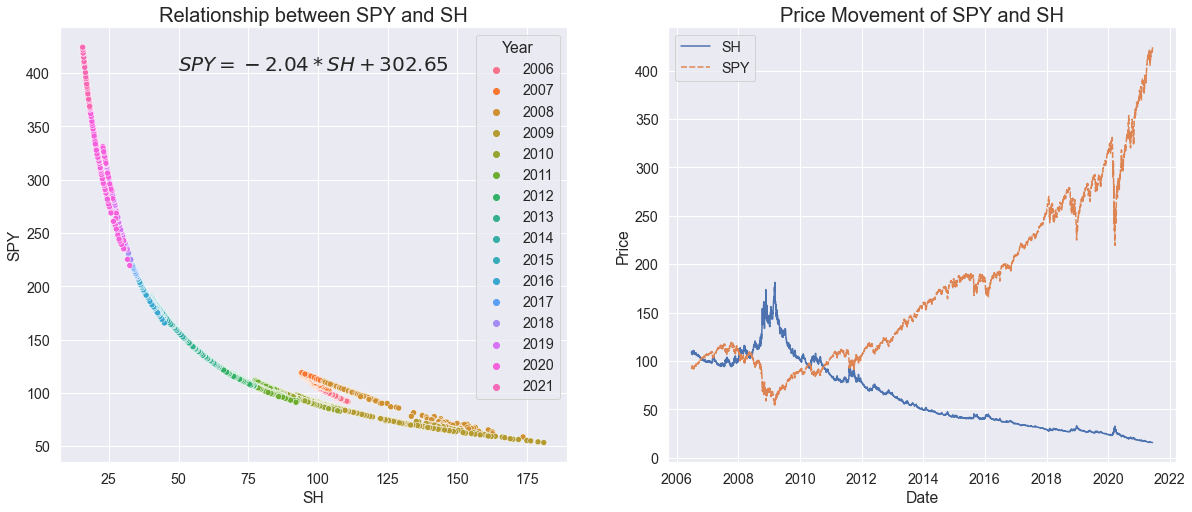

2. Relationship between SPY(1x) and SDS(-2x)


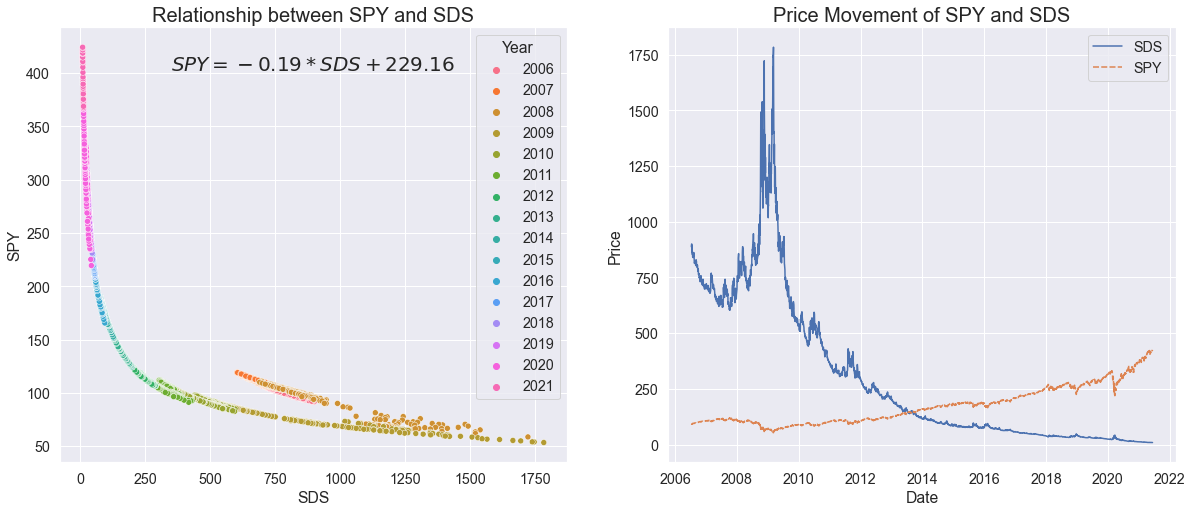

3. Relationship between SPY(1x) and UPRO(3x)


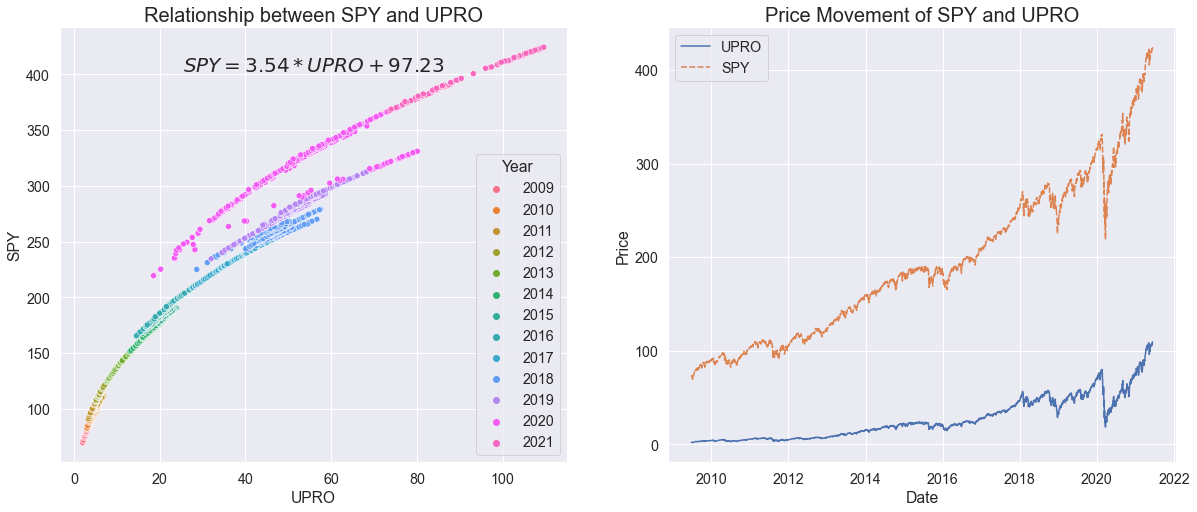

4. Relationship between SPY(1x) and SSO(2x)


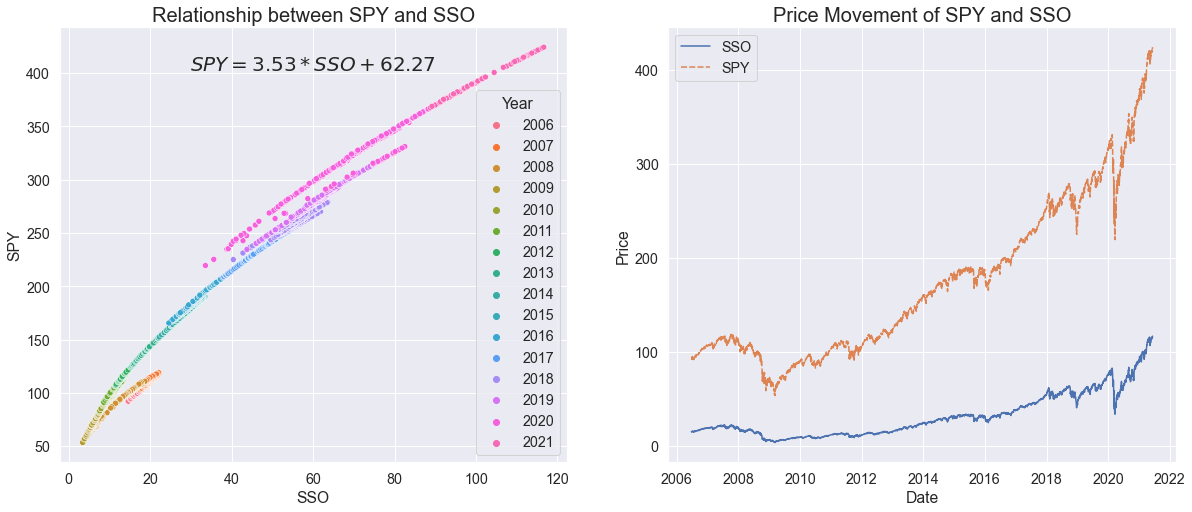

5. Relationship between SPY(1x) and SPXU(-3x)


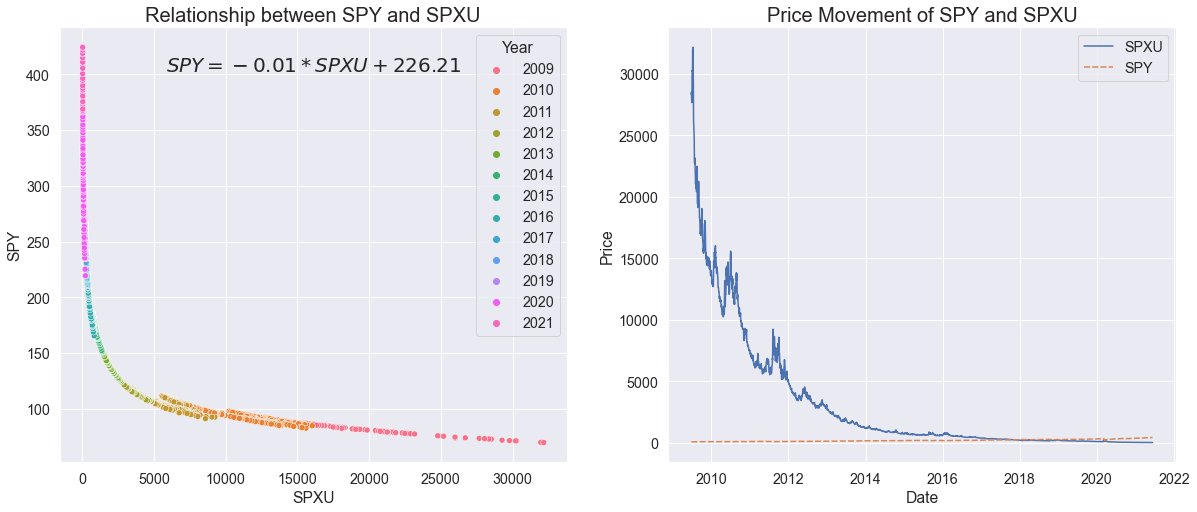

6. Relationship between SH(-1x) and SDS(-2x)


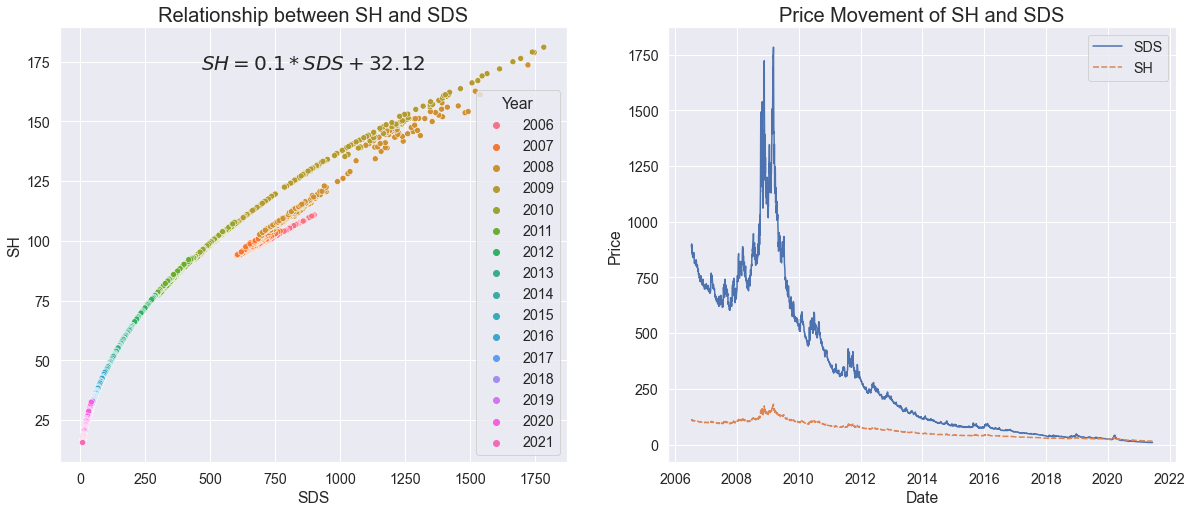

7. Relationship between SH(-1x) and UPRO(3x)


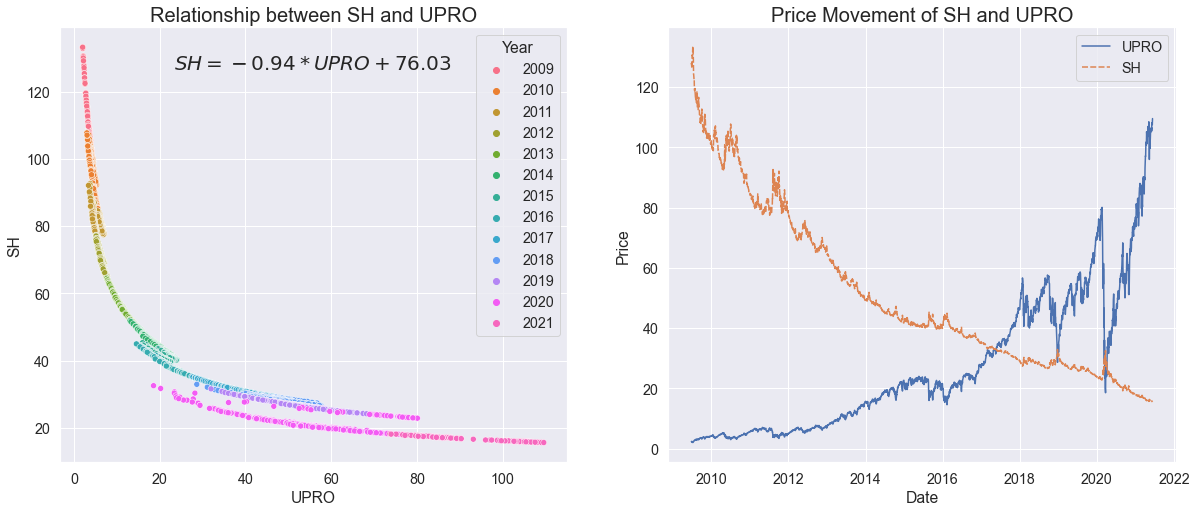

8. Relationship between SH(-1x) and SSO(2x)


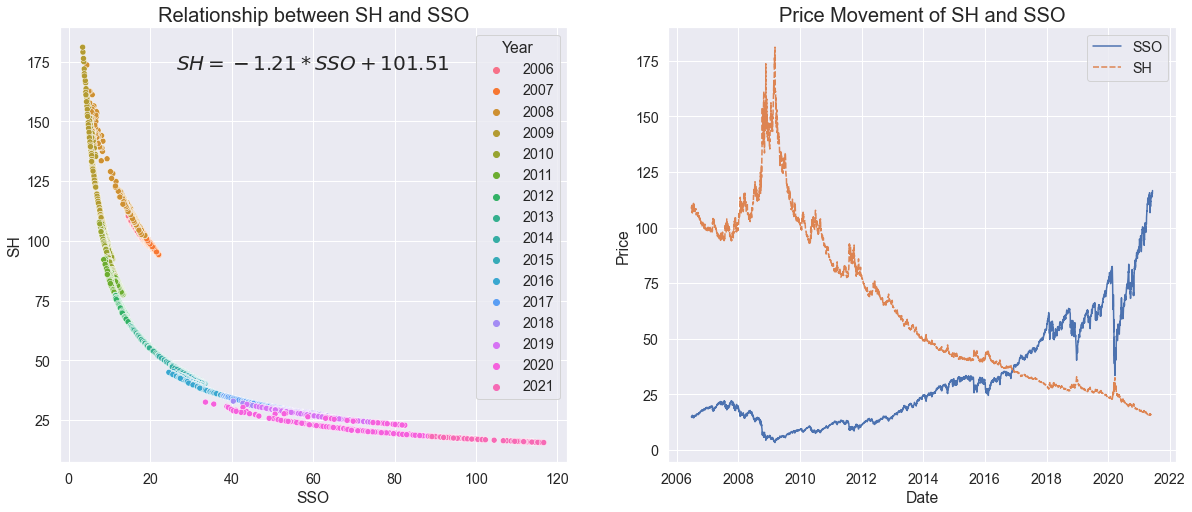

9. Relationship between SH(-1x) and SPXU(-3x)


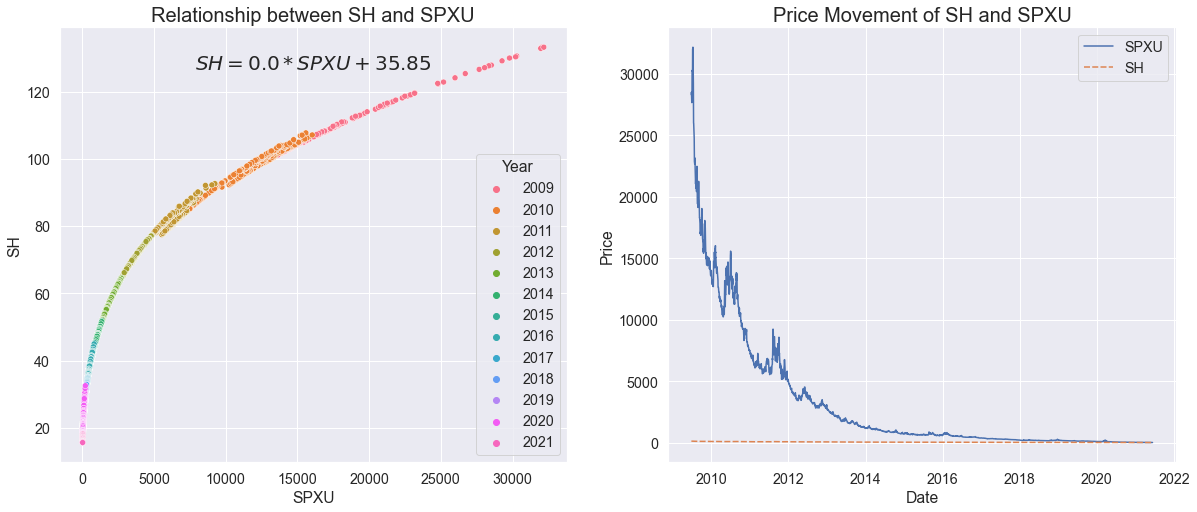

10. Relationship between SDS(-2x) and UPRO(3x)


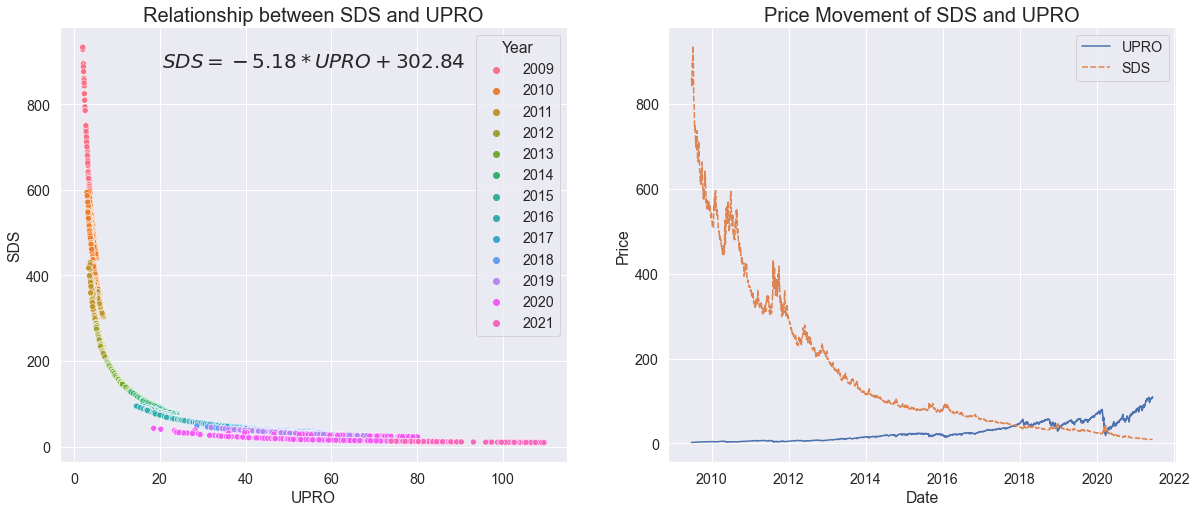

11. Relationship between SDS(-2x) and SSO(2x)


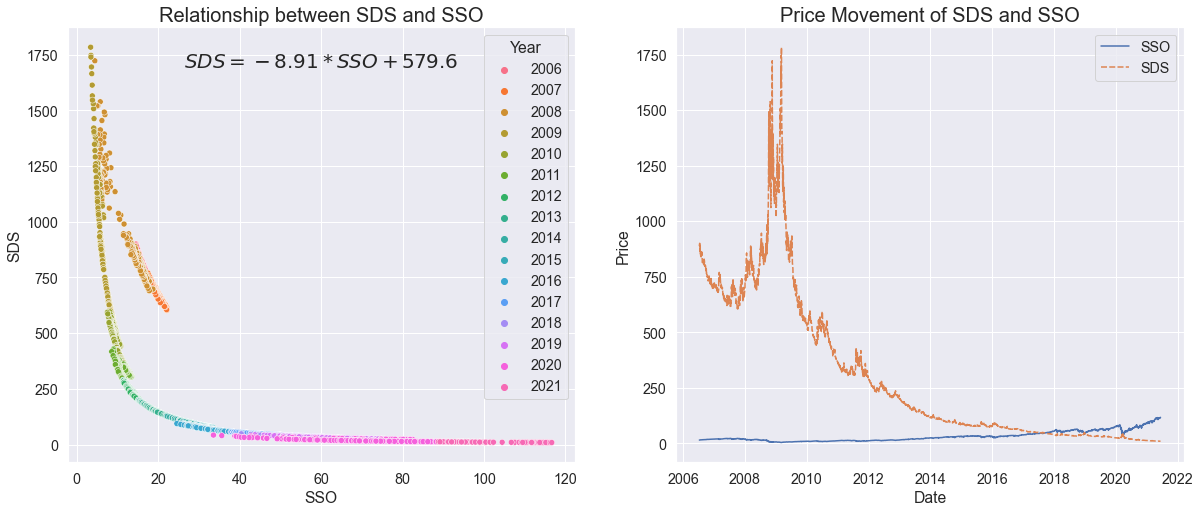

12. Relationship between SDS(-2x) and SPXU(-3x)


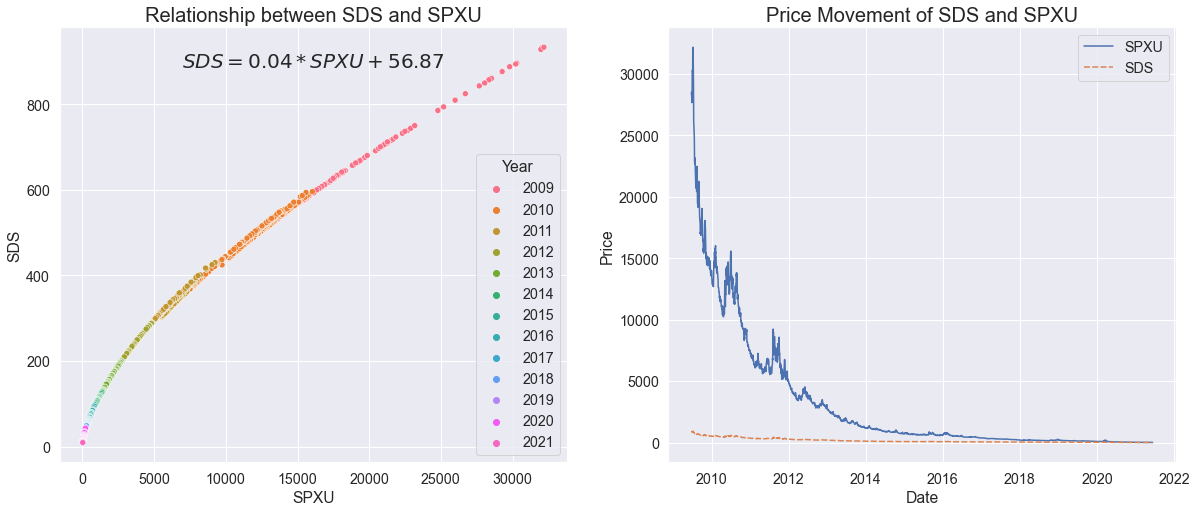

13. Relationship between UPRO(3x) and SSO(2x)


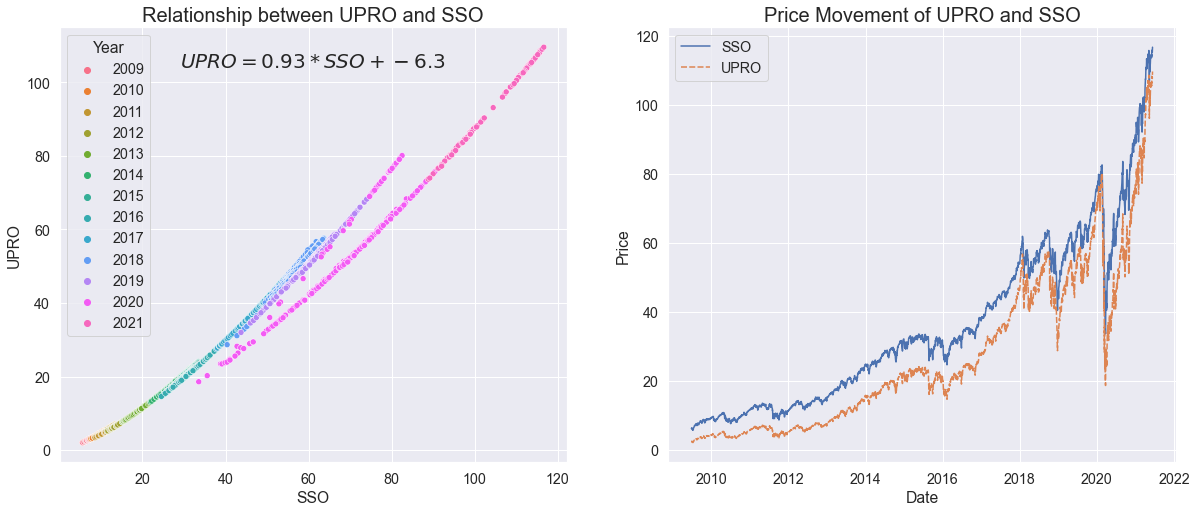

14. Relationship between UPRO(3x) and SPXU(-3x)


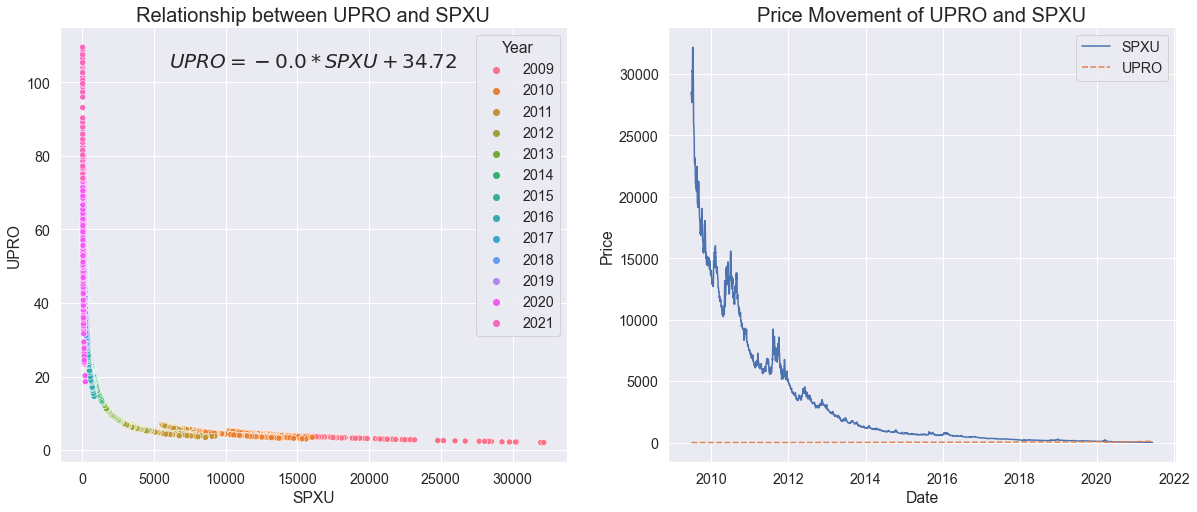

15. Relationship between SSO(2x) and SPXU(-3x)


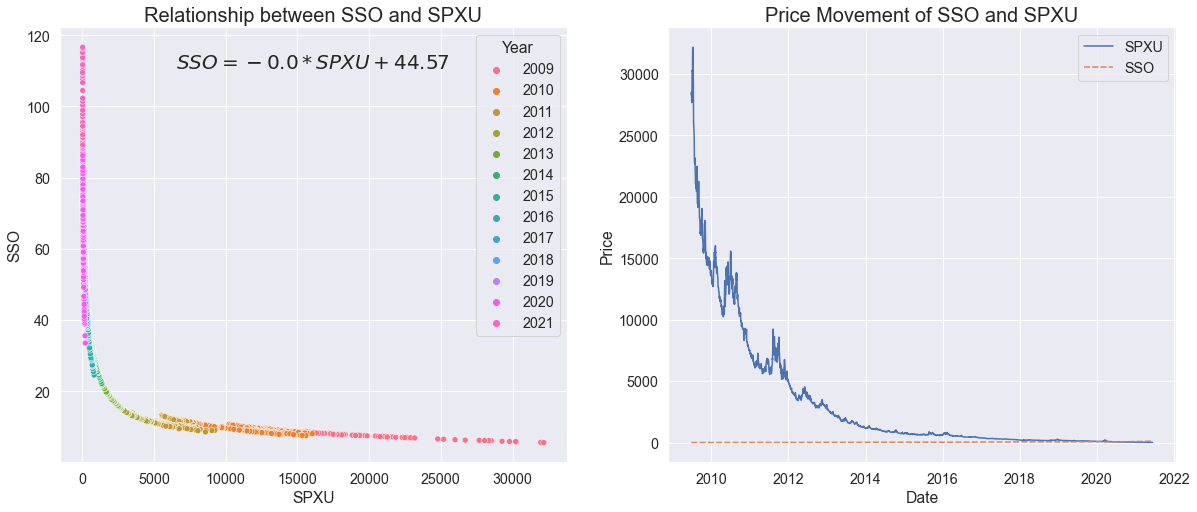

In [287]:
period = None # Number of samples to plot
for i, (x_ticker, y_ticker) in enumerate(itertools.combinations(TICKERS, 2)):
    print("{}. Relationship between {}({}) and {}({})".format(i + 1, x_ticker, LEVERAGES[x_ticker], y_ticker, LEVERAGES[y_ticker]))
    data_pair, slope, constant = plot(x_ticker, y_ticker, period)

### Use two years data

1. Relationship between SPY(1x) and SH(-1x)


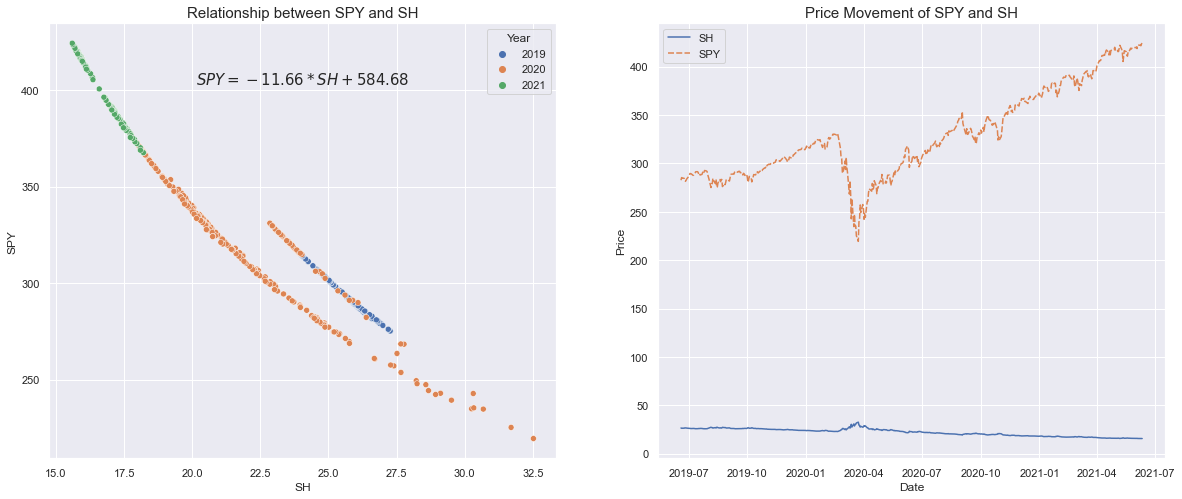

2. Relationship between SPY(1x) and SDS(-2x)


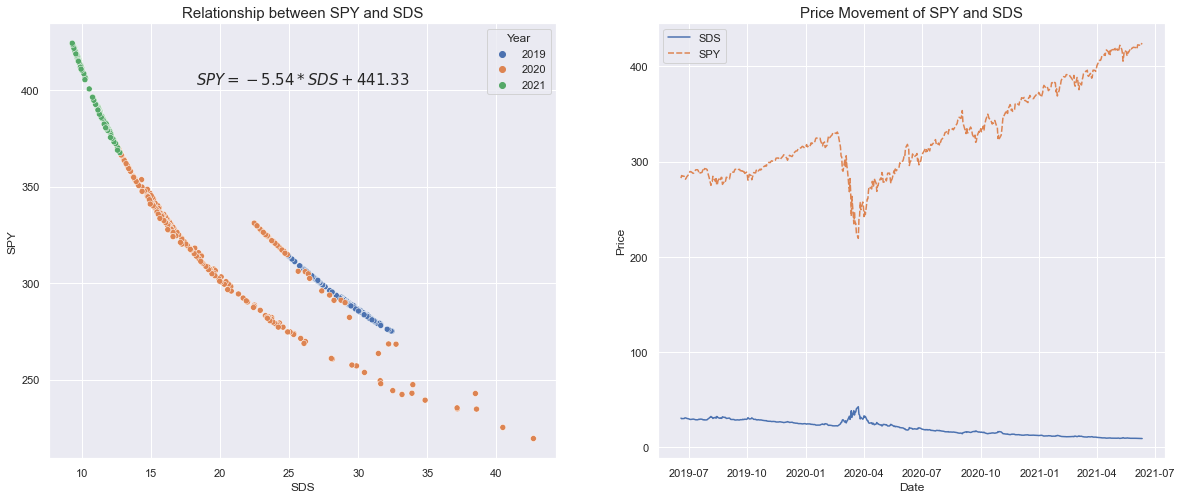

3. Relationship between SPY(1x) and UPRO(3x)


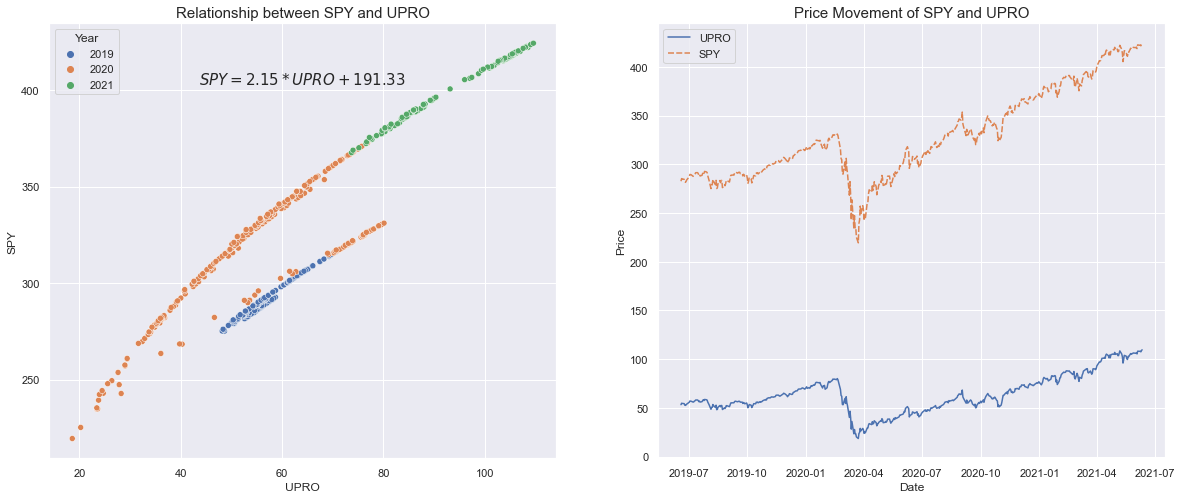

4. Relationship between SPY(1x) and SSO(2x)


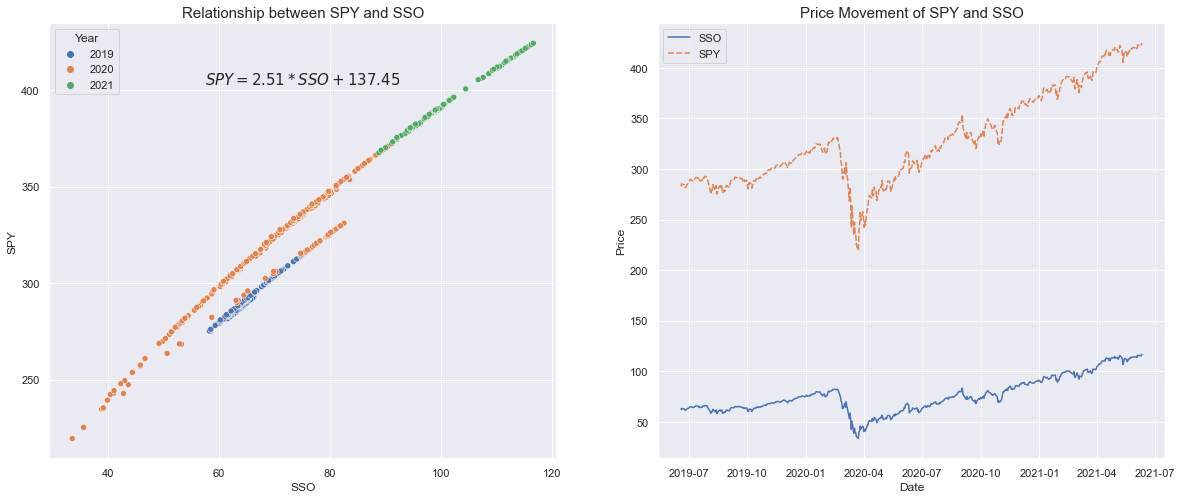

5. Relationship between SPY(1x) and SPXU(-3x)


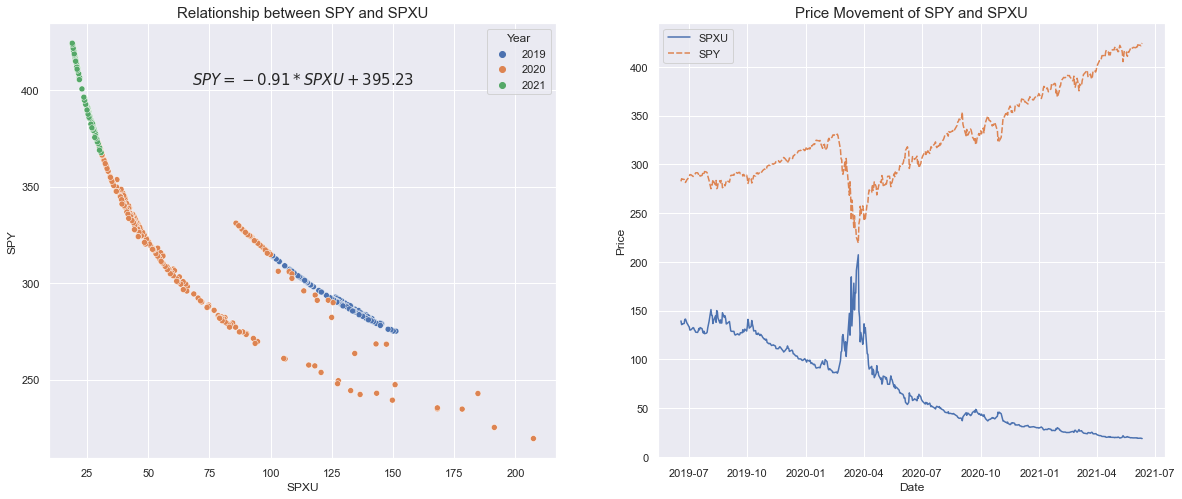

6. Relationship between SH(-1x) and SDS(-2x)


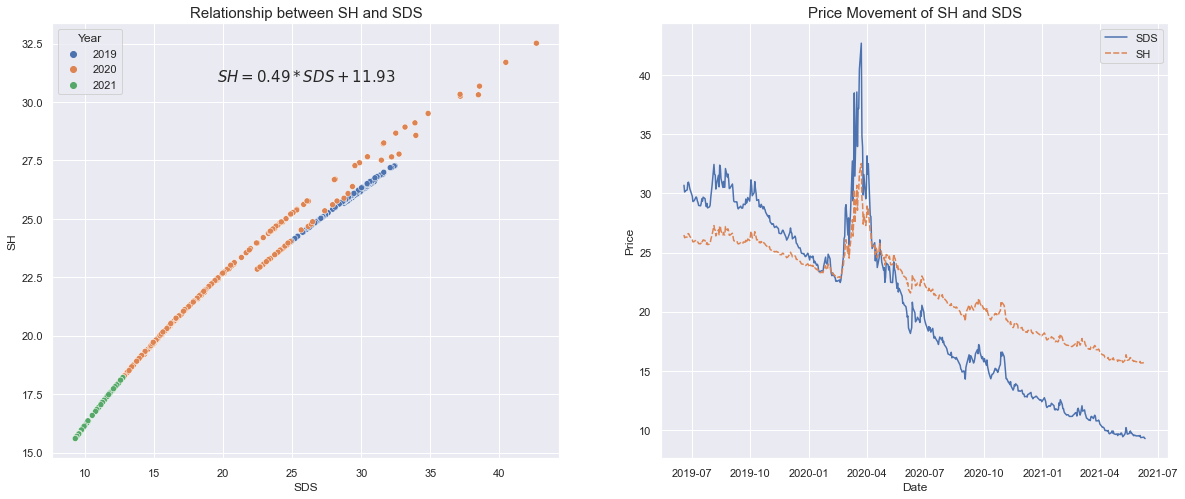

7. Relationship between SH(-1x) and UPRO(3x)


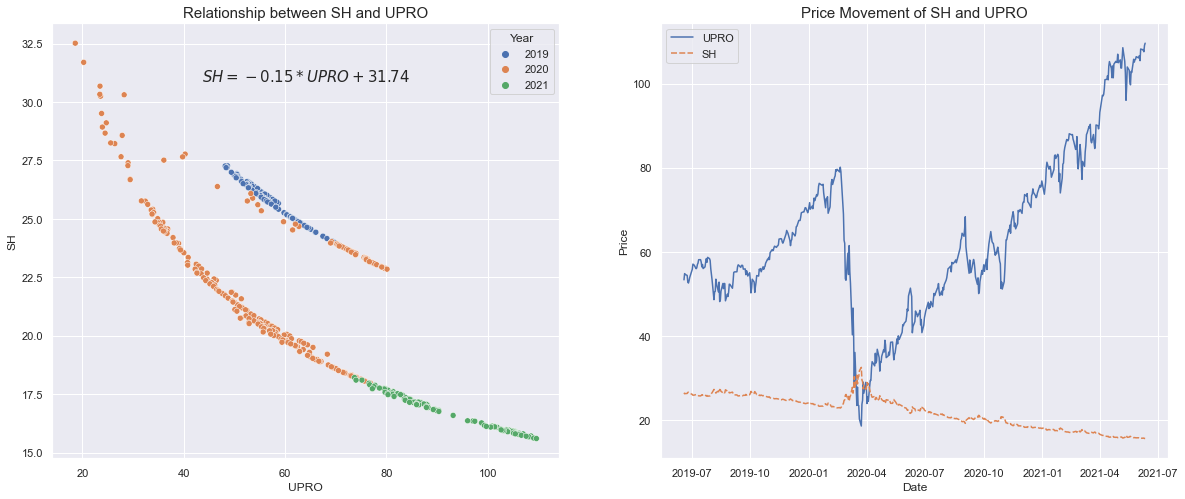

8. Relationship between SH(-1x) and SSO(2x)


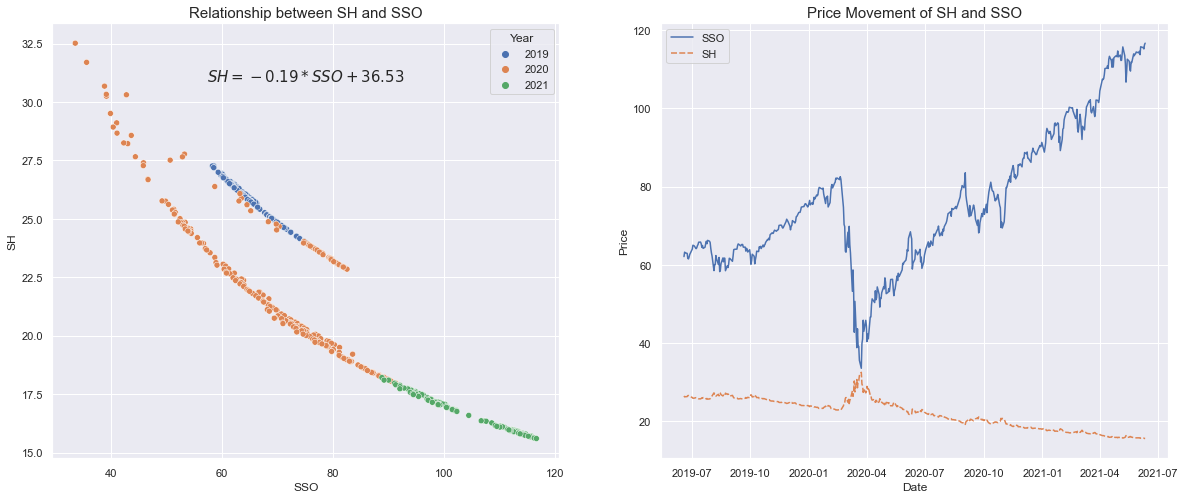

9. Relationship between SH(-1x) and SPXU(-3x)


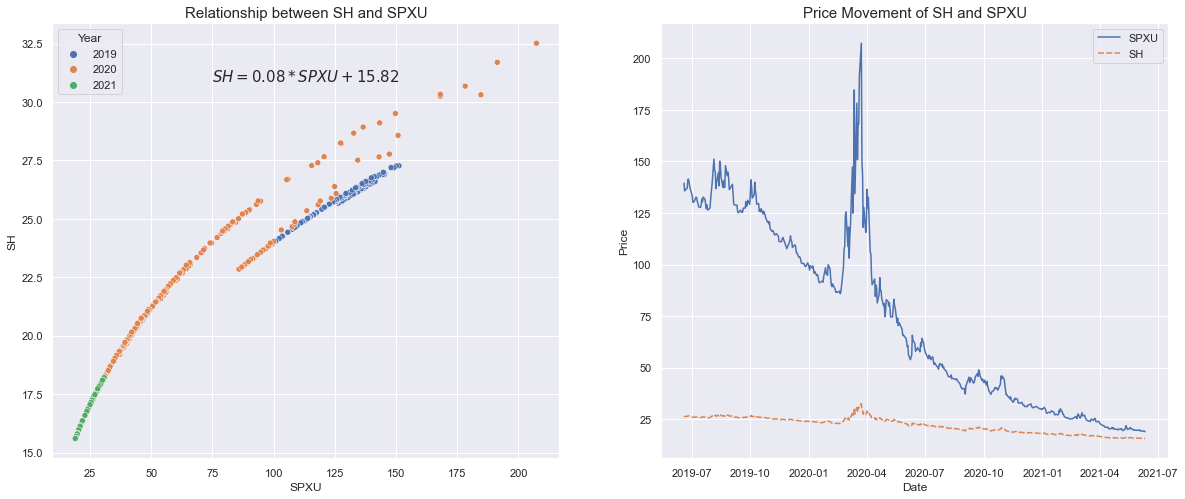

10. Relationship between SDS(-2x) and UPRO(3x)


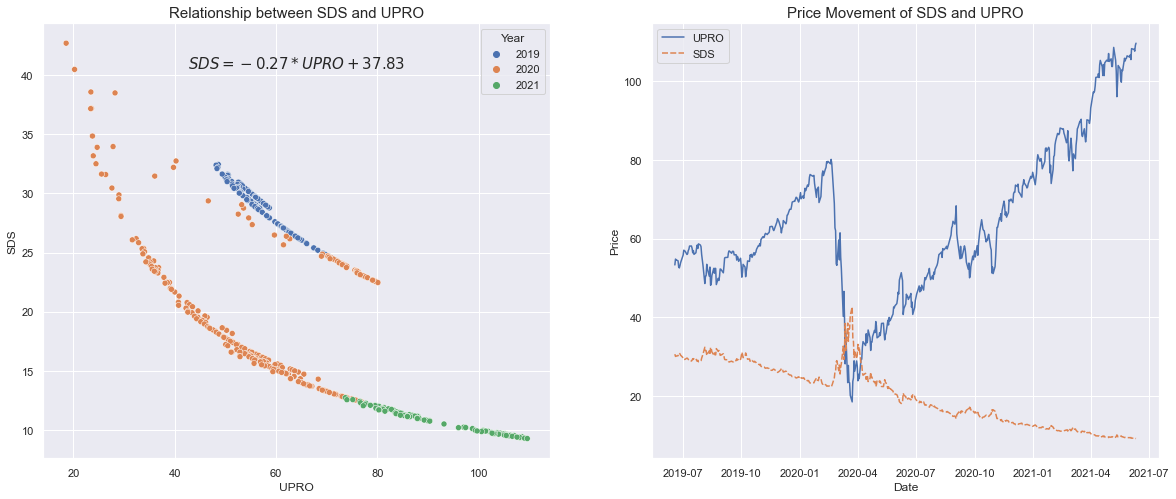

11. Relationship between SDS(-2x) and SSO(2x)


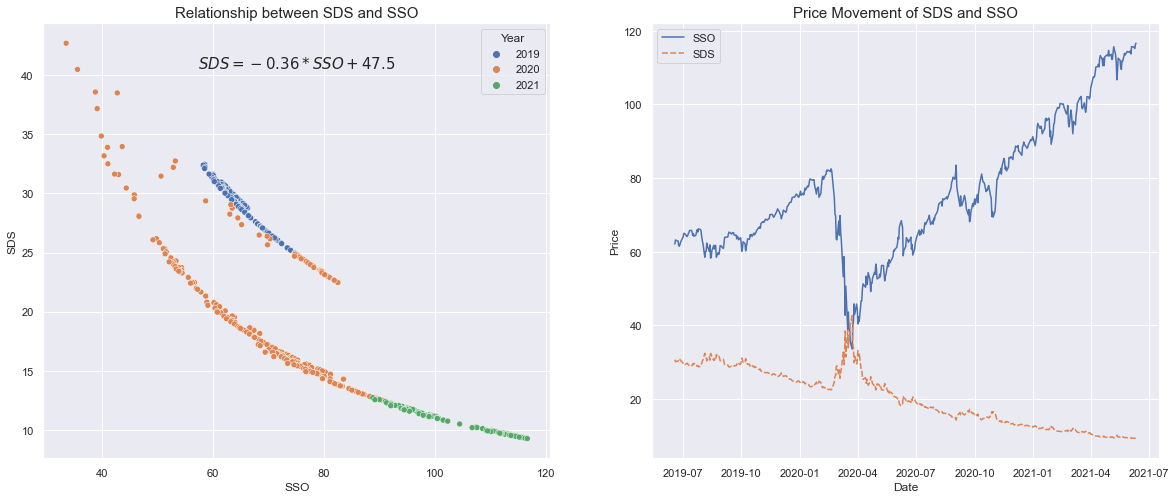

12. Relationship between SDS(-2x) and SPXU(-3x)


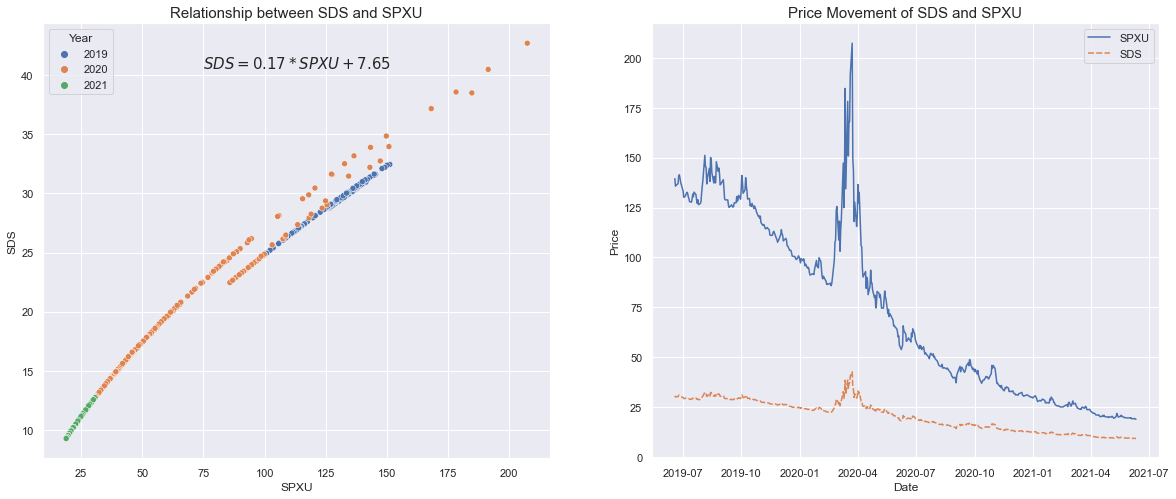

13. Relationship between UPRO(3x) and SSO(2x)


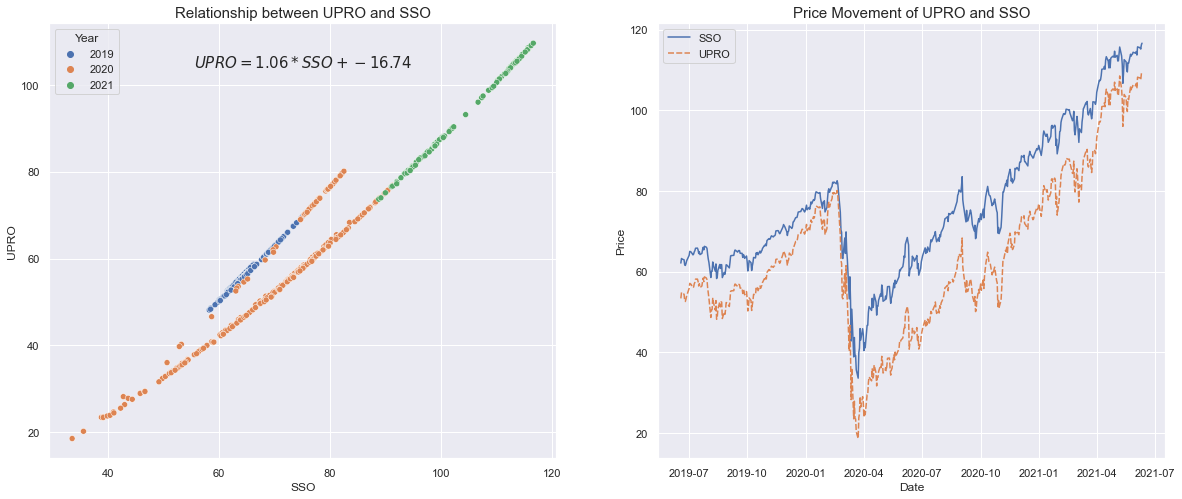

14. Relationship between UPRO(3x) and SPXU(-3x)


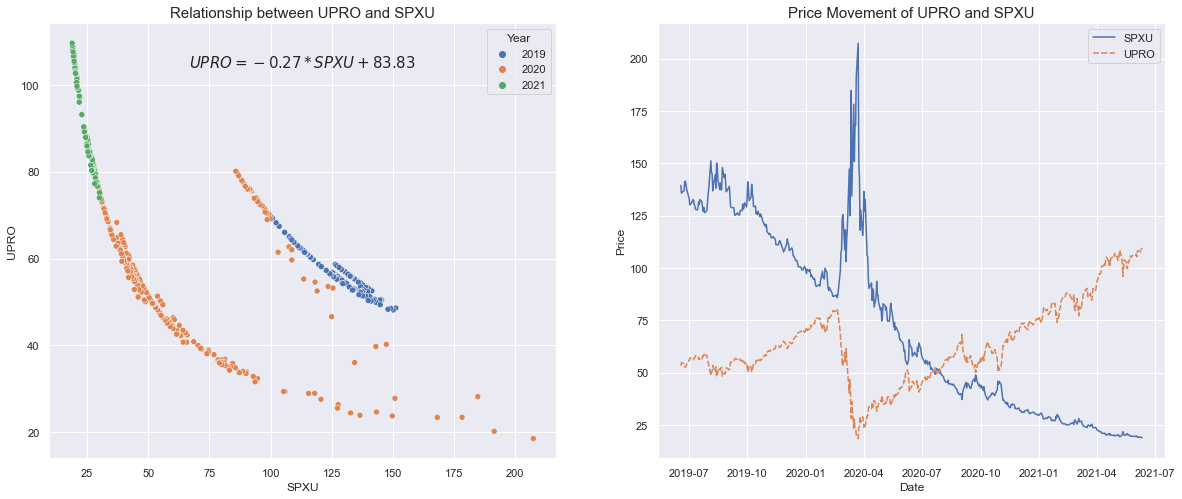

15. Relationship between SSO(2x) and SPXU(-3x)


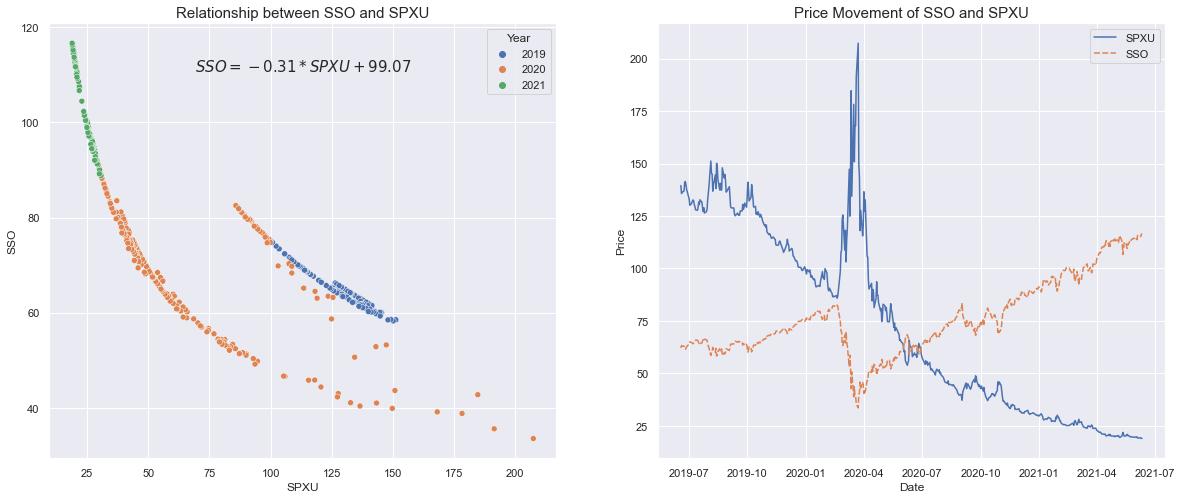

In [249]:
period = 500 # Number of samples to plot
for i, (x_ticker, y_ticker) in enumerate(itertools.combinations(TICKERS, 2)):
    print("{}. Relationship between {}({}) and {}({})".format(i + 1, x_ticker, LEVERAGES[x_ticker], y_ticker, LEVERAGES[y_ticker]))
    data_pair, slope, constant= plot(x_ticker, y_ticker, period)

### Use one year data

1. Relationship between SPY(1x) and SH(-1x)


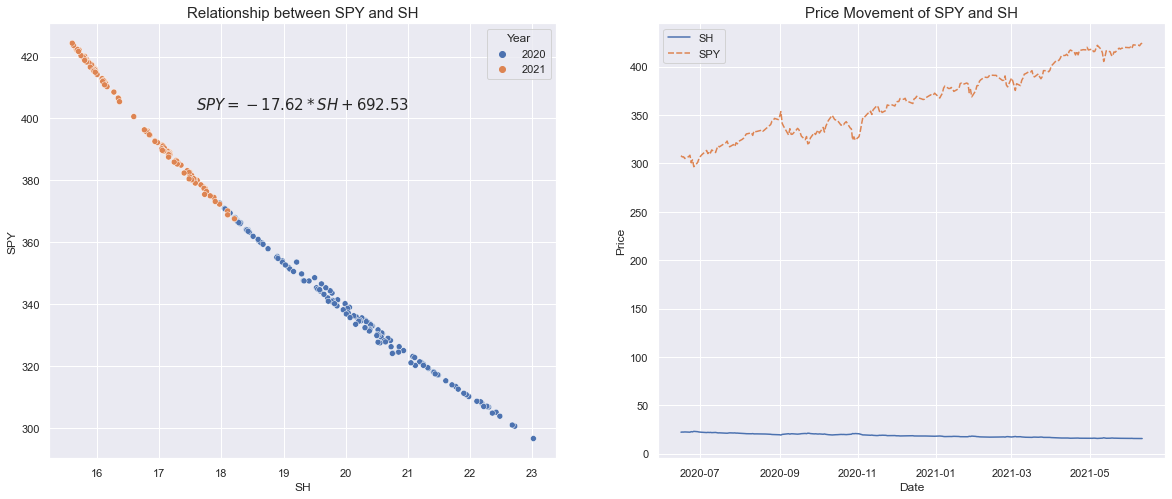

2. Relationship between SPY(1x) and SDS(-2x)


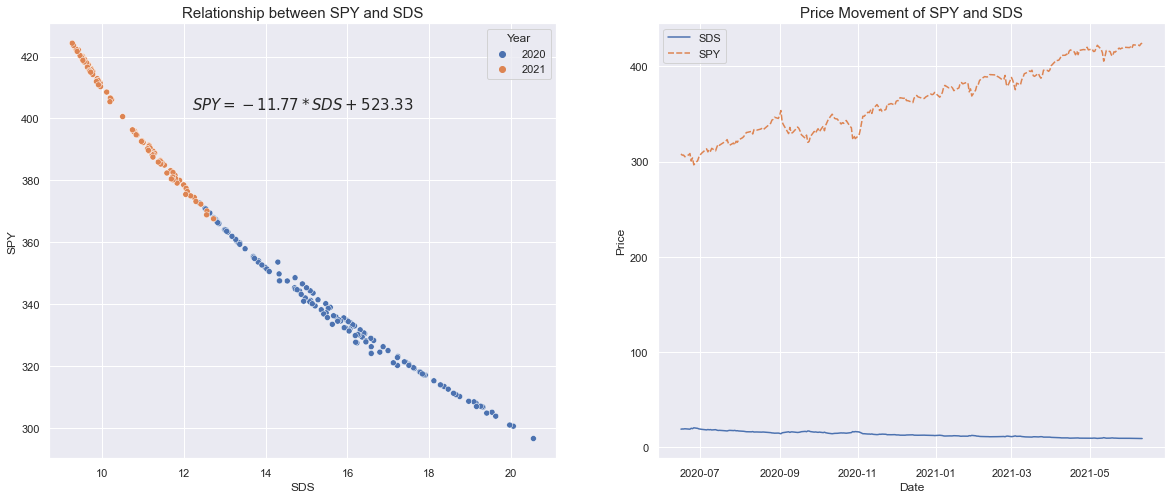

3. Relationship between SPY(1x) and UPRO(3x)


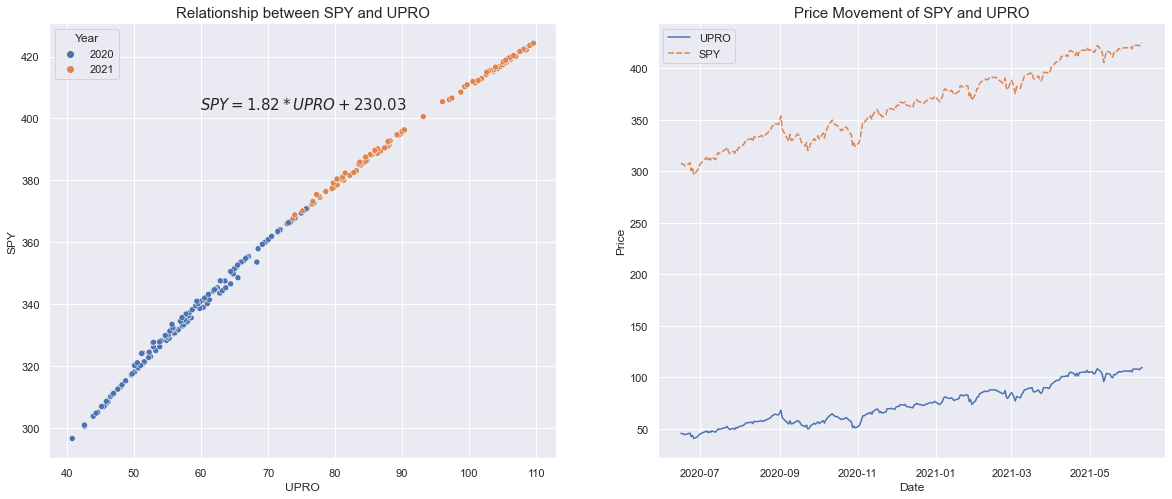

4. Relationship between SPY(1x) and SSO(2x)


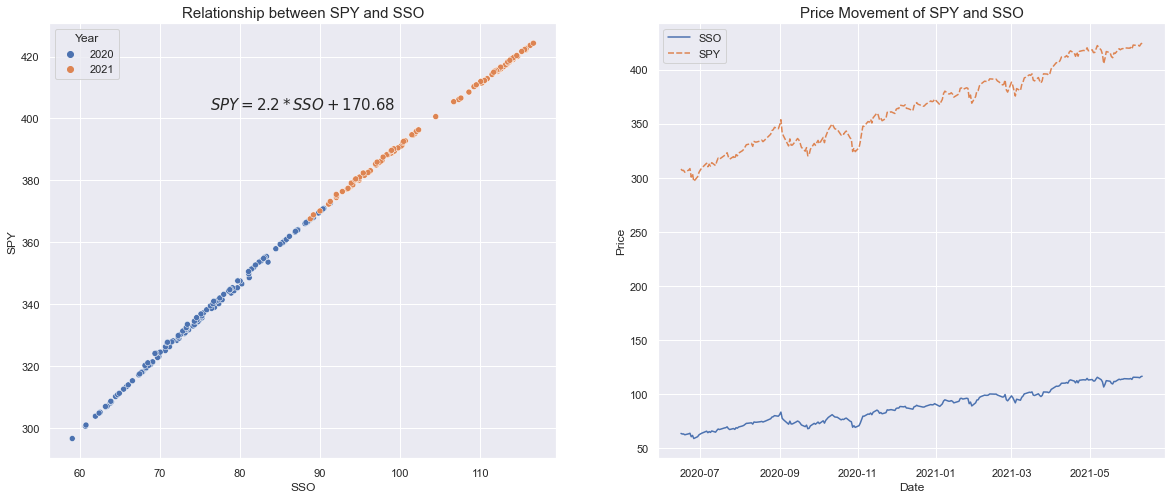

5. Relationship between SPY(1x) and SPXU(-3x)


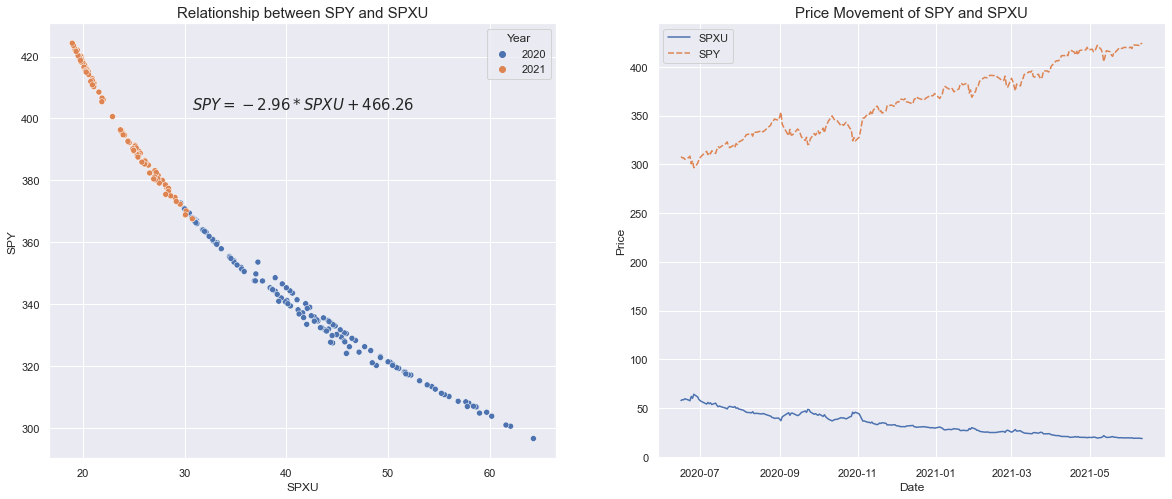

6. Relationship between SH(-1x) and SDS(-2x)


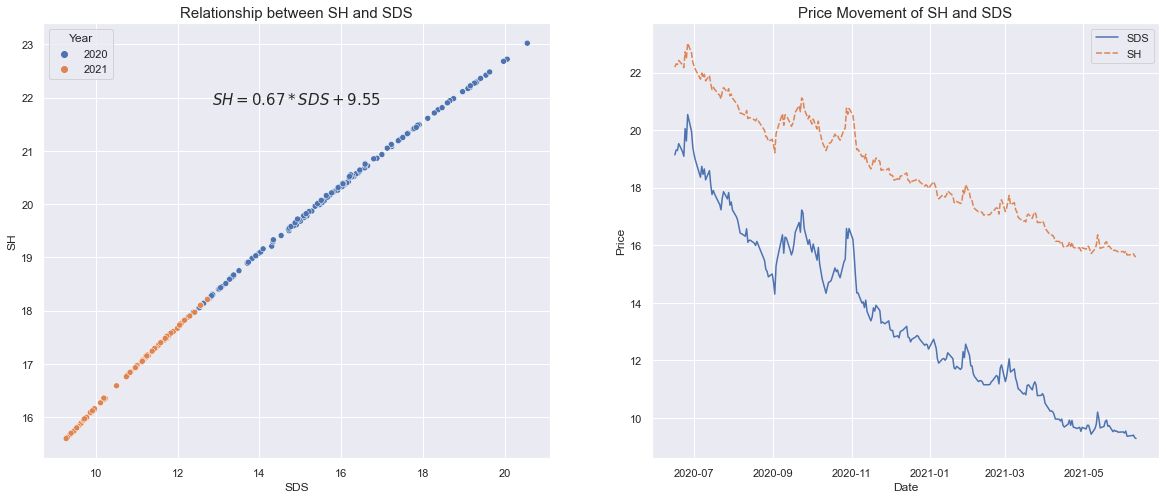

7. Relationship between SH(-1x) and UPRO(3x)


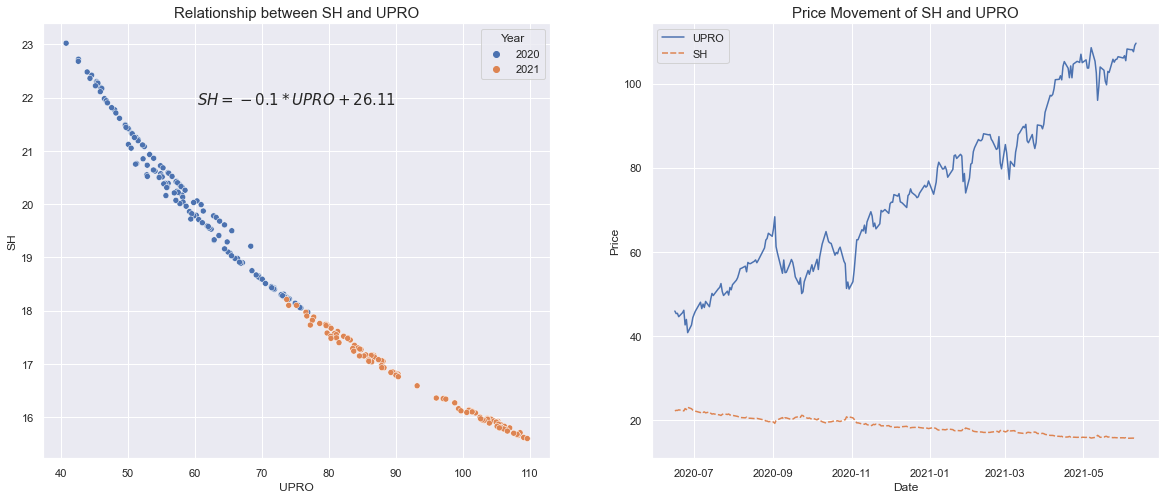

8. Relationship between SH(-1x) and SSO(2x)


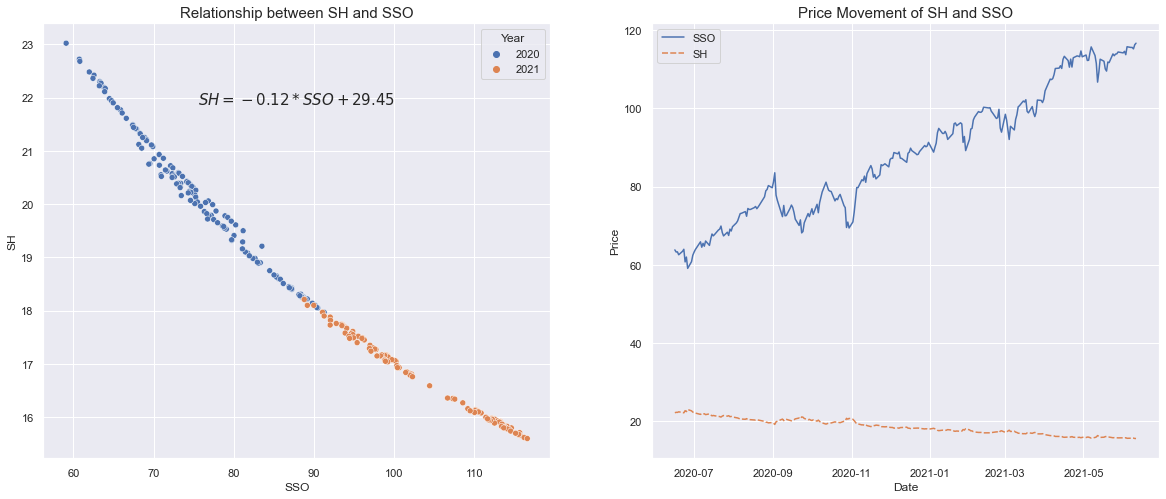

9. Relationship between SH(-1x) and SPXU(-3x)


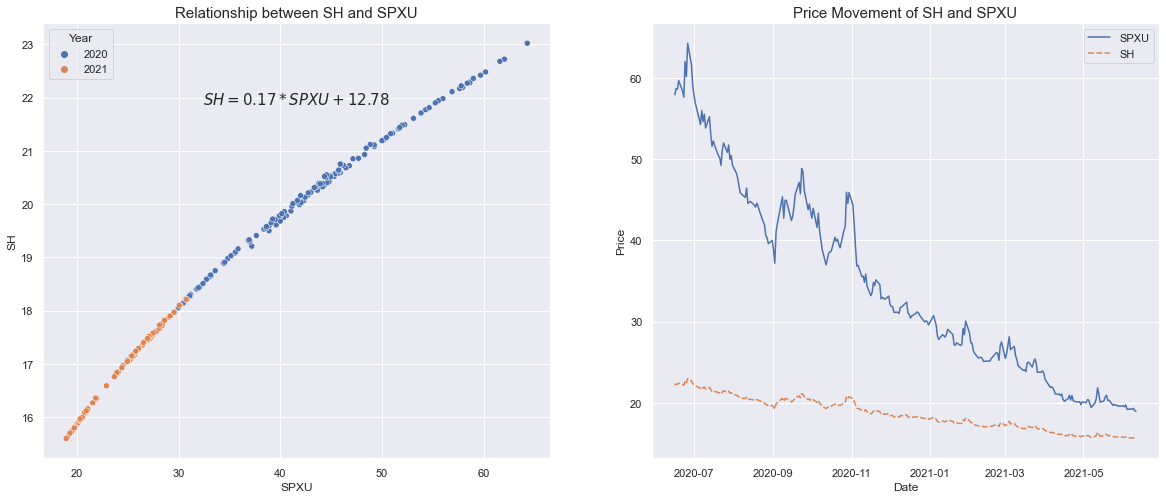

10. Relationship between SDS(-2x) and UPRO(3x)


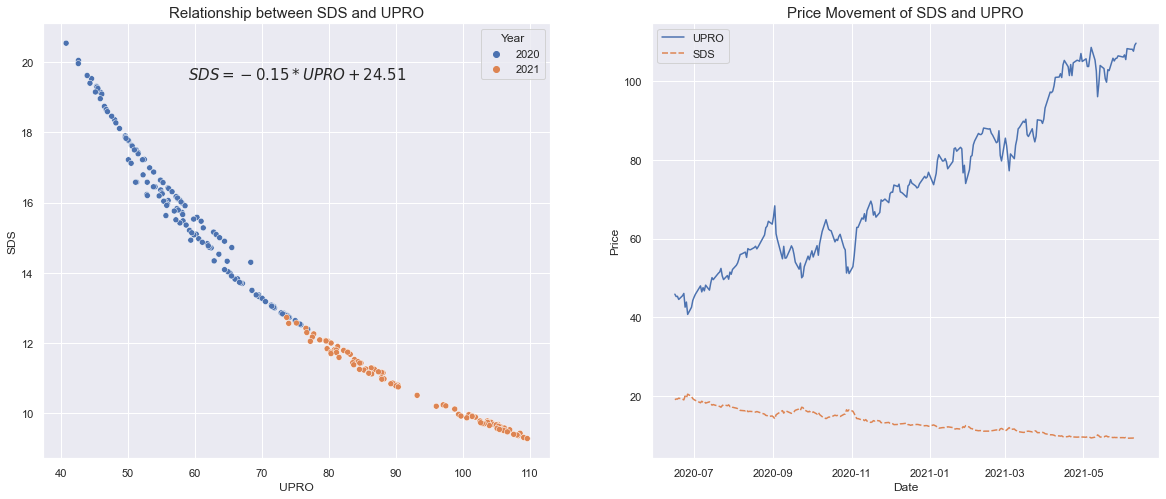

11. Relationship between SDS(-2x) and SSO(2x)


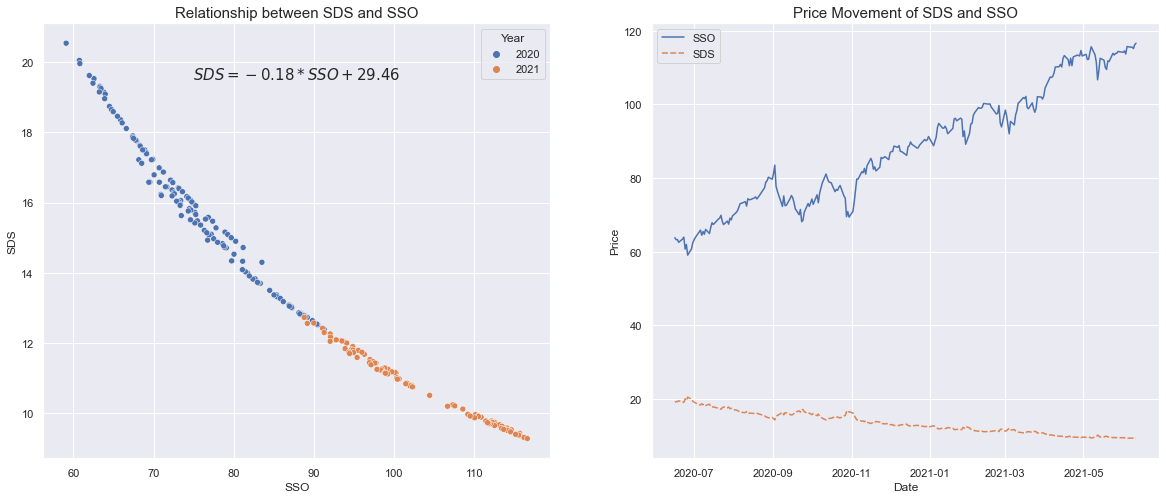

12. Relationship between SDS(-2x) and SPXU(-3x)


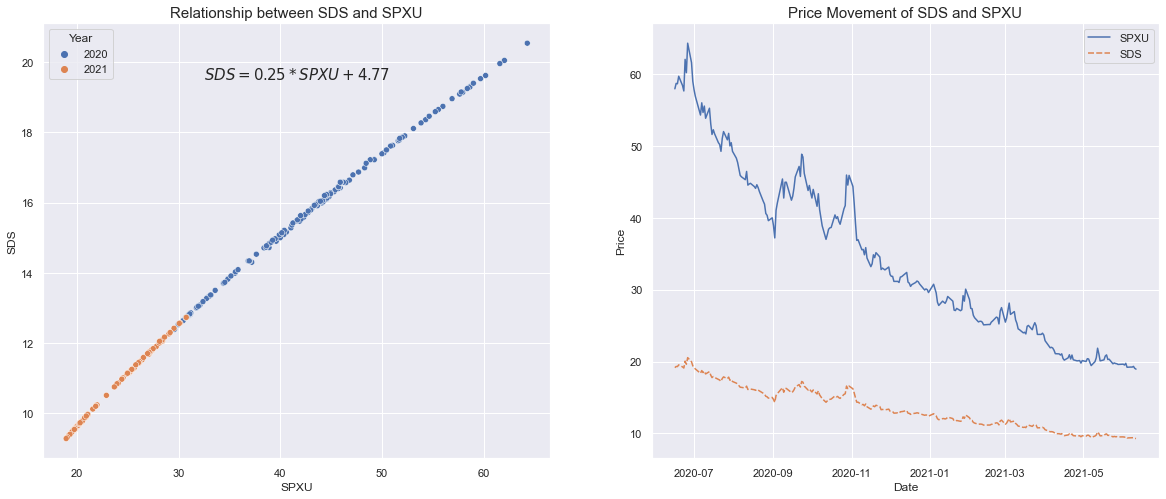

13. Relationship between UPRO(3x) and SSO(2x)


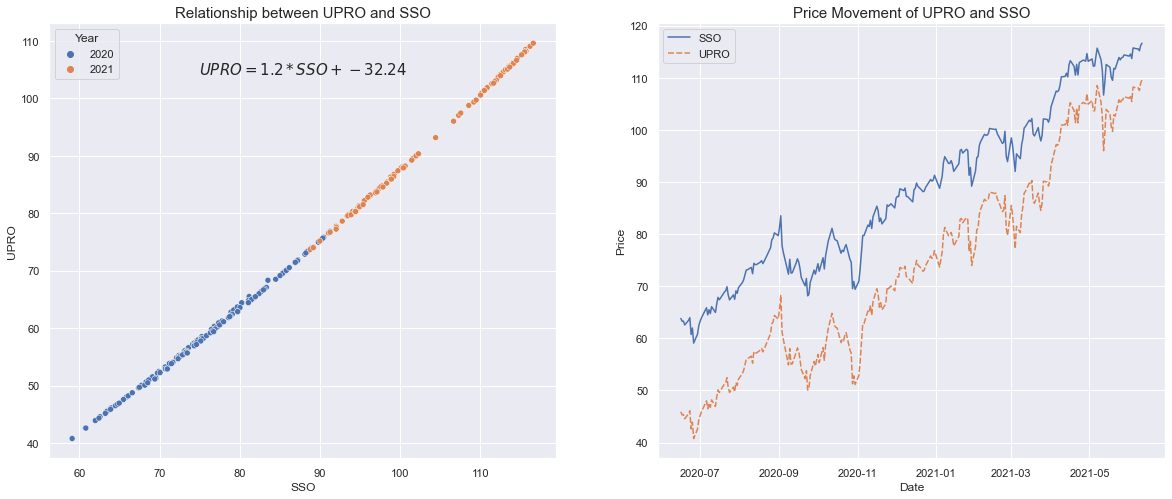

14. Relationship between UPRO(3x) and SPXU(-3x)


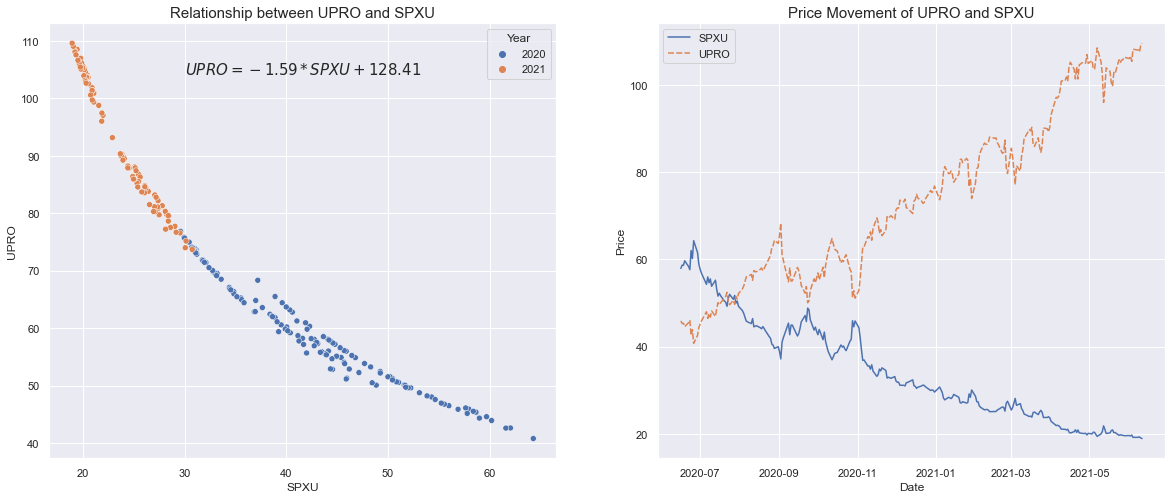

15. Relationship between SSO(2x) and SPXU(-3x)


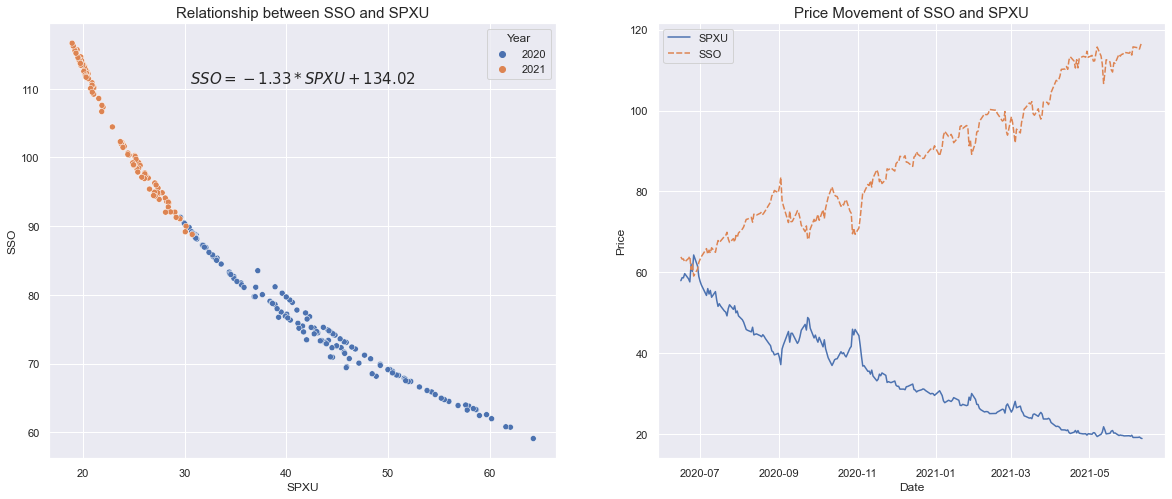

In [250]:
period = 250 # Number of samples to plot
for i, (x_ticker, y_ticker) in enumerate(itertools.combinations(TICKERS, 2)):
    print("{}. Relationship between {}({}) and {}({})".format(i + 1, x_ticker, LEVERAGES[x_ticker], y_ticker, LEVERAGES[y_ticker]))
    data_pair, slope, constant = plot(x_ticker, y_ticker, period)

### Scatter plot, price movement, and residual plot between two ETFs

Relationship between SH(-1x) and SPXU(-3x)


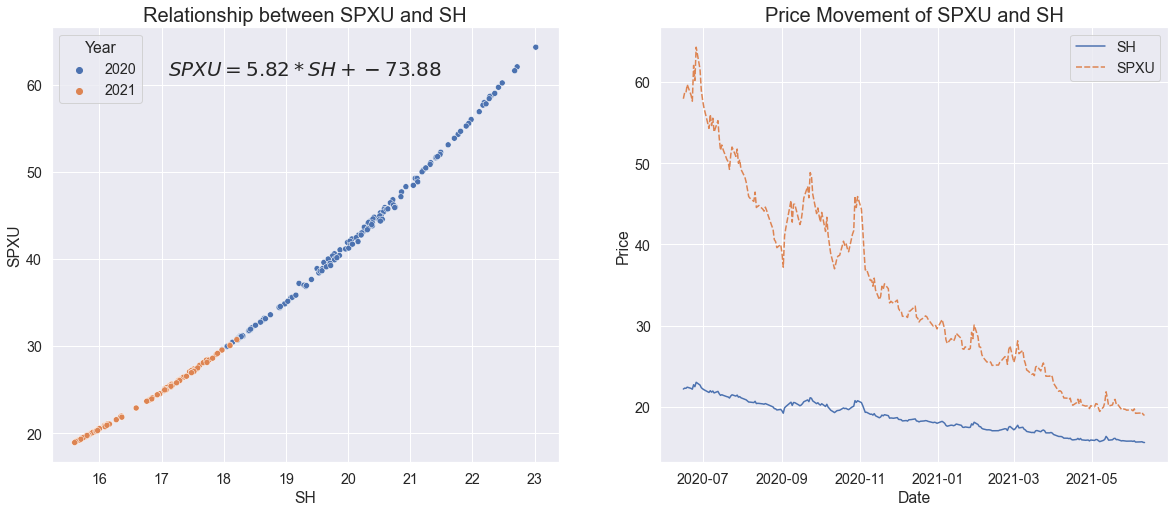

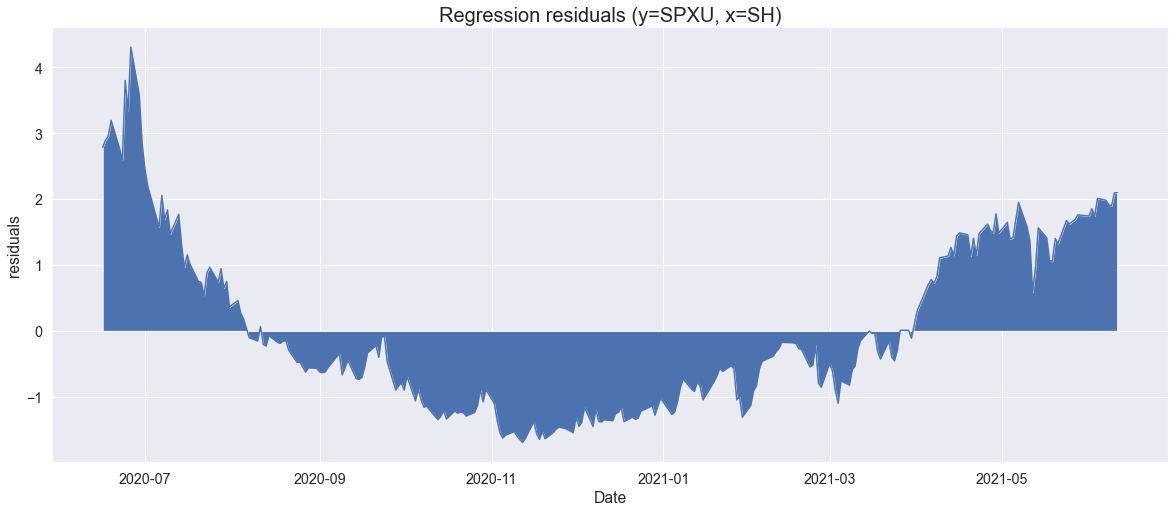

In [329]:
x_ticker, y_ticker = "SH", "SPXU"
period = 250

print("Relationship between {}({}) and {}({})".format(x_ticker, LEVERAGES[x_ticker], y_ticker, LEVERAGES[y_ticker]))
data_pair, slope, constant = plot(y_ticker, x_ticker, period=period)
pred_y = constant + slope * data_pair[x_ticker]

data_pair["residuals"] = data_pair[y_ticker] - pred_y
plt.figure(figsize=(20,8))
plt.title("Regression residuals (y={}, x={})".format(y_ticker, x_ticker), fontsize=20)
sns.lineplot(data=data_pair["residuals"])
plt.fill_between(data_pair.index, data_pair["residuals"])
plt.show()

In [330]:
RES_NUM = 6
LOOK_BACK_WINDOW = 10
data_pair["pnl_abs"] = data_pair["residuals"].shift(-LOOK_BACK_WINDOW) - data_pair["residuals"]  # forward pnl
data_pair['residual_bucket'] = pd.cut(data_pair['residuals'], RES_NUM, labels = False)


Average 10 day pnl for 6 bucket:
residual_bucket
0    0.109290
1    0.012660
2   -0.051756
3   -0.196732
4   -0.944234
5   -2.162295
Name: pnl_abs, dtype: float64/n


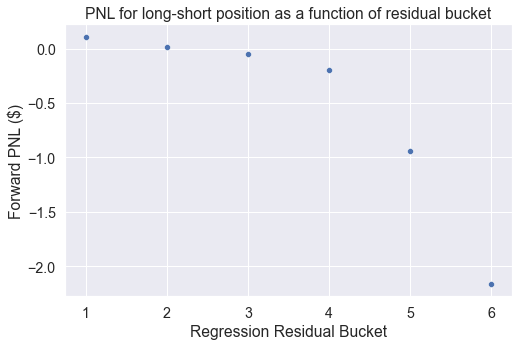

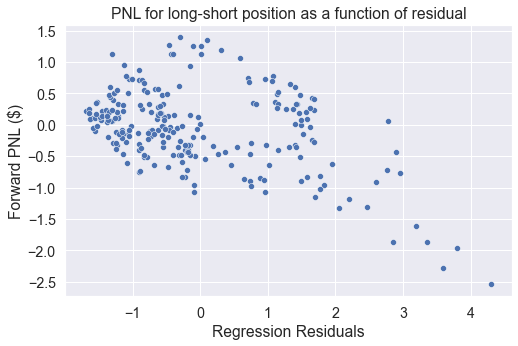

In [331]:
# residual_bucket vs avg_pnl
mapping = data_pair.groupby(["residual_bucket"])["pnl_abs"].mean()
print("Average {} day pnl for {} bucket:".format(LOOK_BACK_WINDOW, RES_NUM))
print("{}/n".format(mapping))
data_pair = data_pair.assign(avg_pnl = data_pair.residual_bucket.map(mapping))

sns.scatterplot(x = np.arange(RES_NUM) + 1, y = mapping)
# plt.scatter(df.residual_bucket,df.avg_pnl)
plt.xlabel("Regression Residual Bucket")
plt.ylabel("Forward PNL ($)")
plt.title("PNL for long-short position as a function of residual bucket")
plt.show()

sns.scatterplot(x = data_pair["residuals"], y = data_pair["pnl_abs"])
plt.xlabel("Regression Residuals")
plt.ylabel("Forward PNL ($)")
plt.title("PNL for long-short position as a function of residual")
plt.show()

In [308]:
data_pair

SH        SDS  Year  residuals   pnl_abs  residual_bucket
Date                                                                        
2020-06-16  22.190001  19.139999  2020   0.339163  0.007607              NaN
2020-06-17  22.299999  19.309999  2020   0.345852 -0.041227              NaN
2020-06-18  22.280001  19.290001  2020   0.355545 -0.077609              NaN
2020-06-19  22.420000  19.530001  2020   0.387693 -0.204970              NaN
2020-06-22  22.270000  19.250000  2020   0.330391 -0.079447              NaN
...               ...        ...   ...        ...       ...              ...
2021-06-07  15.670000   9.380000  2021   0.259166       NaN              NaN
2021-06-08  15.680000   9.380000  2021   0.244319       NaN              NaN
2021-06-09  15.700000   9.400000  2021   0.234626       NaN              NaN
2021-06-10  15.620000   9.310000  2021   0.263399       NaN              NaN
2021-06-11  15.600000   9.280000  2021   0.263091       NaN              NaN

[250 rows x 6 columns]

In [215]:
collect_historical("SH").head()

Open        High         Low       Close  Volume  Dividends  \
Date                                                                            
2006-06-21  109.873736  109.873736  108.274324  108.493851    2200        0.0   
2006-06-22  109.058347  109.795324  108.979940  109.356270    3600        0.0   
2006-06-23  109.701256  109.732624  108.697701  109.387650    4050        0.0   
2006-06-26  109.450377  109.607180  108.964271  109.042679    4400        0.0   
2006-06-27  108.979935  110.030530  108.979935  109.983490    8850        0.0   

            Stock Splits  
Date                      
2006-06-21           0.0  
2006-06-22           0.0  
2006-06-23           0.0  
2006-06-26           0.0  
2006-06-27           0.0

In [ ]:
predicted_Y = constant + slope * df.mid2
df['residuals'] = df.mid1 - predicted_Y

In [41]:
df = pd.read_csv("../SH_SDS_data.csv",index_col=0).head()